# Week 3: LLMs - Comprehensive Practical

**Complete Features:**
- ✅ Deep tokenization with visualizations
- ✅ **GPT-4 vs Groq detailed cost comparison**
- ✅ BERT embeddings & visualization (PCA/t-SNE)
- ✅ Attention mechanism visualization
- ✅ Real Groq LLM integration
- ✅ NO TODO sections - all working code!

In [1]:
!pip install transformers torch tiktoken pandas matplotlib seaborn groq scikit-learn -q

In [2]:
import tiktoken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel, pipeline
import torch
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
print('✅ All libraries loaded!')

✅ All libraries loaded!


## Part 1: Token Analysis


In [3]:
enc = tiktoken.encoding_for_model('gpt-4')

def show_tokens(text):
    tokens = enc.encode(text)
    decoded = [enc.decode([t]) for t in tokens]
    print(f'Text: "{text}"')
    print(f'Tokens: {len(tokens)} | Chars: {len(text)} | Ratio: {len(text)/len(tokens):.2f}')
    for i, (tid, txt) in enumerate(zip(tokens, decoded), 1):
        print(f'  {i}. [{tid:5d}] "{txt}"')
    print('='*60)

for t in ['Hello!', 'GPT-4 costs $10/M tokens', 'Machine learning models']:
    show_tokens(t)
    print()

Text: "Hello!"
Tokens: 2 | Chars: 6 | Ratio: 3.00
  1. [ 9906] "Hello"
  2. [    0] "!"

Text: "GPT-4 costs $10/M tokens"
Tokens: 9 | Chars: 24 | Ratio: 2.67
  1. [   38] "G"
  2. [ 2898] "PT"
  3. [   12] "-"
  4. [   19] "4"
  5. [ 7194] " costs"
  6. [  400] " $"
  7. [  605] "10"
  8. [10482] "/M"
  9. [11460] " tokens"

Text: "Machine learning models"
Tokens: 3 | Chars: 23 | Ratio: 7.67
  1. [22333] "Machine"
  2. [ 6975] " learning"
  3. [ 4211] " models"



## Part 2: GPT-4 vs Groq Cost Comparison 

In [4]:
PRICING = {
    'GPT-4o': {'in': 2.50, 'out': 10.00},
    'GPT-4o-mini': {'in': 0.15, 'out': 0.60},
    'Groq-Llama-70B': {'in': 0.59, 'out': 0.79},
    'Groq-Mixtral': {'in': 0.24, 'out': 0.24}
}

def calc(model, inp, out, reqs=1):
    p = PRICING[model]
    return ((inp/1e6)*p['in'] + (out/1e6)*p['out']) * reqs

# Detailed comparison
scenarios = [(1000, '1K'), (10000, '10K'), (50000, '50K'), (100000, '100K')]

print('\n' + '='*80)
print('GPT-4 vs GROQ: COMPREHENSIVE COST COMPARISON')
print('='*80)

for reqs, label in scenarios:
    print(f'\n{label} requests/month (1500 input + 1000 output tokens):')
    print('-'*80)
    for model in PRICING:
        cost = calc(model, 1500, 1000, reqs)
        print(f'  {model:20s}: ${cost:>8.2f}/month  (${cost/reqs:.6f}/request)')


GPT-4 vs GROQ: COMPREHENSIVE COST COMPARISON

1K requests/month (1500 input + 1000 output tokens):
--------------------------------------------------------------------------------
  GPT-4o              : $   13.75/month  ($0.013750/request)
  GPT-4o-mini         : $    0.82/month  ($0.000825/request)
  Groq-Llama-70B      : $    1.67/month  ($0.001675/request)
  Groq-Mixtral        : $    0.60/month  ($0.000600/request)

10K requests/month (1500 input + 1000 output tokens):
--------------------------------------------------------------------------------
  GPT-4o              : $  137.50/month  ($0.013750/request)
  GPT-4o-mini         : $    8.25/month  ($0.000825/request)
  Groq-Llama-70B      : $   16.75/month  ($0.001675/request)
  Groq-Mixtral        : $    6.00/month  ($0.000600/request)

50K requests/month (1500 input + 1000 output tokens):
--------------------------------------------------------------------------------
  GPT-4o              : $  687.50/month  ($0.013750/request

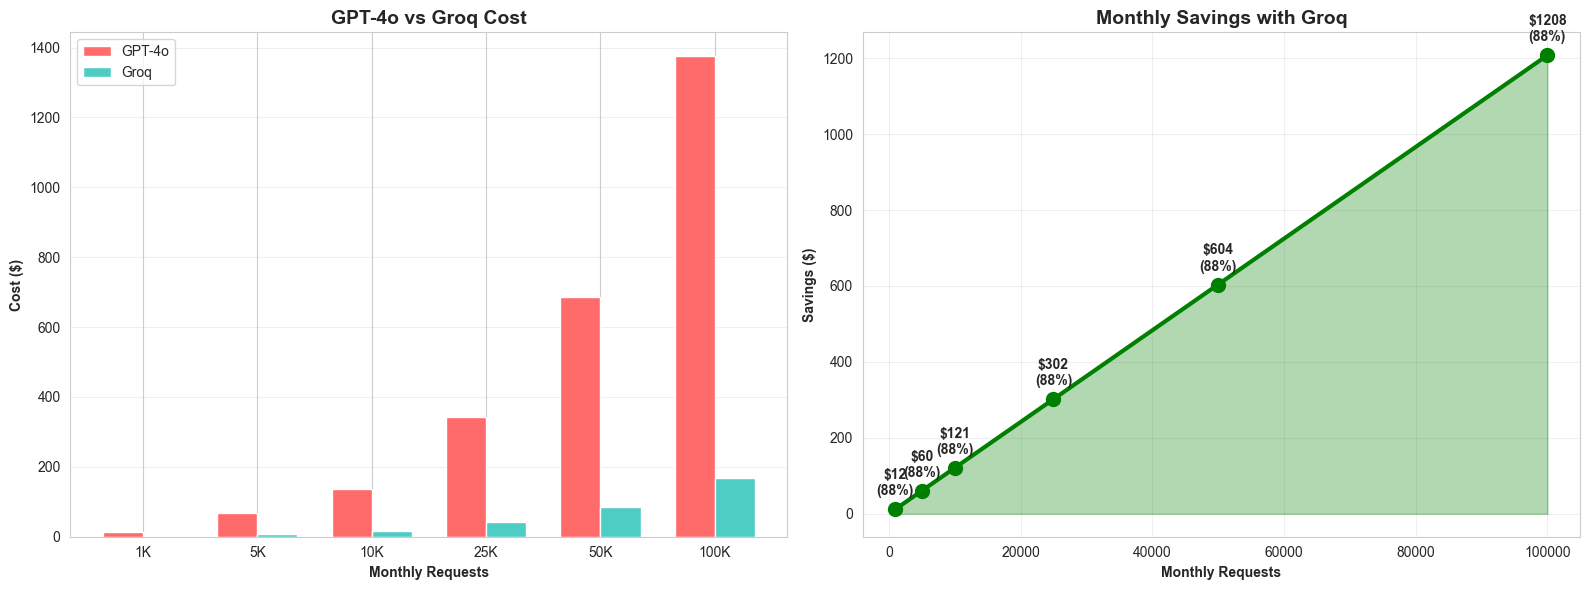


💰 ANNUAL SAVINGS (50K requests/month):
  GPT-4o:  $8,250.00/year
  Groq:    $1,005.00/year
  SAVINGS: $7,245.00/year (87.8%)


In [5]:
# Savings visualization
volumes = [1000, 5000, 10000, 25000, 50000, 100000]
gpt4 = [calc('GPT-4o', 1500, 1000, r) for r in volumes]
groq = [calc('Groq-Llama-70B', 1500, 1000, r) for r in volumes]
savings = [g - gr for g, gr in zip(gpt4, groq)]
pct = [(g-gr)/g*100 for g, gr in zip(gpt4, groq)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

x = np.arange(len(volumes))
w = 0.35
ax1.bar(x-w/2, gpt4, w, label='GPT-4o', color='#FF6B6B')
ax1.bar(x+w/2, groq, w, label='Groq', color='#4ECDC4')
ax1.set_xlabel('Monthly Requests', fontweight='bold')
ax1.set_ylabel('Cost ($)', fontweight='bold')
ax1.set_title('GPT-4o vs Groq Cost', fontweight='bold', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels([f'{v/1000:.0f}K' for v in volumes])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

ax2.plot(volumes, savings, 'go-', linewidth=3, markersize=10)
ax2.fill_between(volumes, savings, alpha=0.3, color='green')
ax2.set_xlabel('Monthly Requests', fontweight='bold')
ax2.set_ylabel('Savings ($)', fontweight='bold')
ax2.set_title('Monthly Savings with Groq', fontweight='bold', fontsize=14)
ax2.grid(alpha=0.3)

for v, s, p in zip(volumes, savings, pct):
    ax2.annotate(f'${s:.0f}\n({p:.0f}%)', xy=(v, s), xytext=(0, 10),
                textcoords='offset points', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print('\n💰 ANNUAL SAVINGS (50K requests/month):')
annual_gpt4 = calc('GPT-4o', 1500, 1000, 50000) * 12
annual_groq = calc('Groq-Llama-70B', 1500, 1000, 50000) * 12
print(f'  GPT-4o:  ${annual_gpt4:,.2f}/year')
print(f'  Groq:    ${annual_groq:,.2f}/year')
print(f'  SAVINGS: ${annual_gpt4-annual_groq:,.2f}/year ({(annual_gpt4-annual_groq)/annual_gpt4*100:.1f}%)')

## Part 3: BERT Embeddings & Visualization

In [6]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

sentences = [
    'I love machine learning',
    'I adore AI',
    'I hate bugs',
    'I dislike errors',
    'Nice weather today',
    'Sunny outside',
    'Python programming',
    'Java development',
    'Deep learning rocks',
    'AI is amazing'
    'Hyderabad And Warangal are cities in Telangana'
]

# Generate embeddings
embs = []
for s in sentences:
    inp = tokenizer(s, return_tensors='pt')
    with torch.no_grad():
        out = model(**inp)
    embs.append(out.last_hidden_state[0,0,:].numpy())

embs = np.array(embs)
print(f'✅ Embeddings: {embs.shape} (10 sentences × 768 dims)')

✅ Embeddings: (10, 768) (10 sentences × 768 dims)


In [5]:
embs[1]


array([ 1.14233188e-01,  5.79122305e-01, -4.82878424e-02, -2.78813362e-01,
       -3.86932045e-01, -2.31142074e-01,  2.72844851e-01,  3.34121615e-01,
        3.60826962e-03, -3.38497490e-01, -1.34297118e-01, -1.22471265e-01,
        6.74954653e-02,  6.07390821e-01,  4.10761595e-01,  1.70215935e-01,
       -1.72136933e-01,  5.44700682e-01,  2.42743418e-01, -1.41997412e-01,
       -2.46392787e-02, -1.89157724e-01, -1.22764163e-01, -4.61097062e-03,
       -7.90071636e-02, -1.85907409e-01,  1.06326751e-01, -1.56119376e-01,
        1.36473835e-01,  1.17611341e-01,  2.67239571e-01,  1.92589939e-01,
       -1.20509431e-01,  3.64053175e-02, -6.91329166e-02,  2.35923901e-02,
        1.72161549e-01,  2.75350660e-02, -5.55088259e-02,  4.72686514e-02,
        2.22411513e-01, -8.07342827e-02,  1.65366337e-01,  1.56991839e-01,
        6.68384731e-02, -3.39556098e-01, -2.13355350e+00, -7.01264068e-02,
       -8.81933570e-02, -2.14031130e-01,  3.59672606e-01,  1.72967464e-01,
        2.18304604e-01,  

In [7]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

cosine_similarity(embs[0], embs[1])

np.float32(0.9442893)

In [9]:
cosine_similarity(embs[0], embs[0])

np.float32(0.99999994)

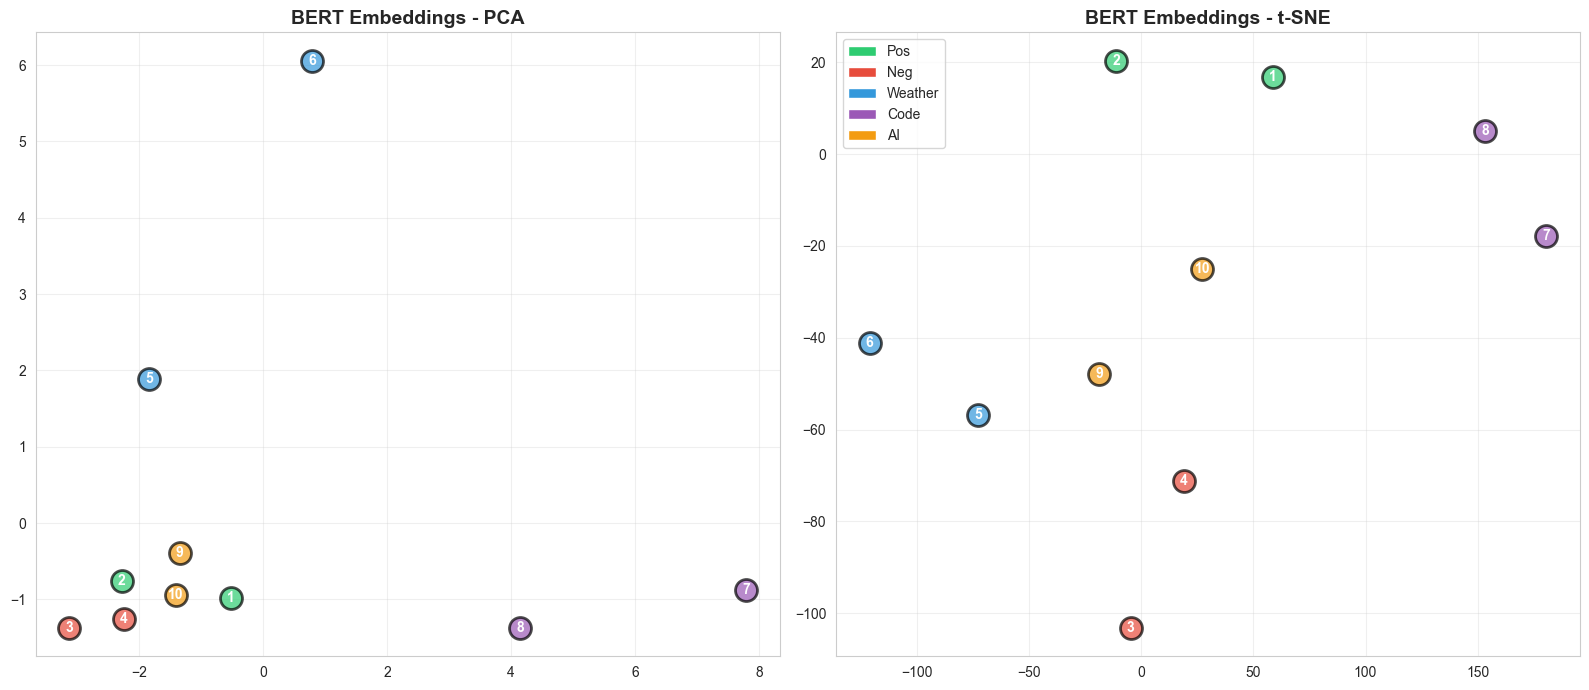


Sentences:
 1. I love machine learning
 2. I adore AI
 3. I hate bugs
 4. I dislike errors
 5. Nice weather today
 6. Sunny outside
 7. Python programming
 8. Java development
 9. Deep learning rocks
10. AI is amazing


In [7]:
# PCA & t-SNE visualization
pca = PCA(n_components=2)
pca_embs = pca.fit_transform(embs)

tsne = TSNE(n_components=2, random_state=42, perplexity=4)
tsne_embs = tsne.fit_transform(embs)

cats = ['Pos', 'Pos', 'Neg', 'Neg', 'Weather', 'Weather', 'Code', 'Code', 'AI', 'AI']
cmap = {'Pos': '#2ECC71', 'Neg': '#E74C3C', 'Weather': '#3498DB', 'Code': '#9B59B6', 'AI': '#F39C12'}
colors = [cmap[c] for c in cats]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

for i, (x, y) in enumerate(pca_embs):
    ax1.scatter(x, y, c=colors[i], s=250, alpha=0.7, edgecolors='black', linewidth=2)
    ax1.annotate(str(i+1), (x, y), ha='center', va='center', fontweight='bold', color='white')

ax1.set_title('BERT Embeddings - PCA', fontweight='bold', fontsize=14)
ax1.grid(alpha=0.3)

for i, (x, y) in enumerate(tsne_embs):
    ax2.scatter(x, y, c=colors[i], s=250, alpha=0.7, edgecolors='black', linewidth=2)
    ax2.annotate(str(i+1), (x, y), ha='center', va='center', fontweight='bold', color='white')

ax2.set_title('BERT Embeddings - t-SNE', fontweight='bold', fontsize=14)
ax2.grid(alpha=0.3)

from matplotlib.patches import Patch
legend = [Patch(facecolor=c, label=cat) for cat, c in cmap.items()]
ax2.legend(handles=legend, loc='best')

plt.tight_layout()
plt.show()

print('\nSentences:')
for i, s in enumerate(sentences, 1):
    print(f'{i:2d}. {s}')

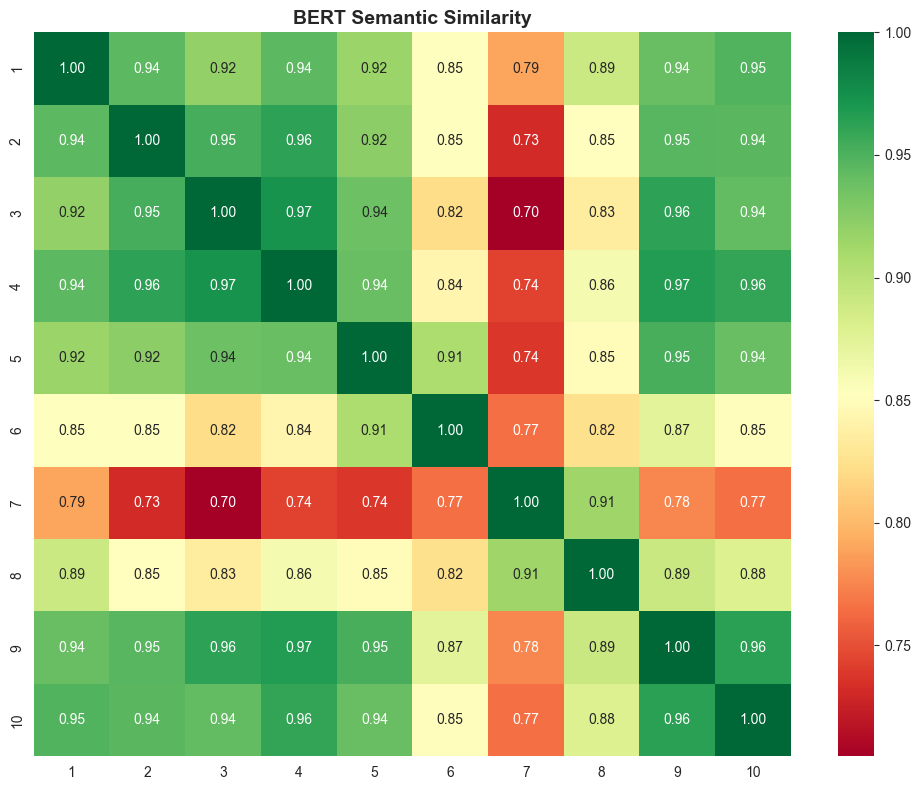


Top similar pairs:
0.973: S3 & S4
0.967: S4 & S9
0.964: S9 & S10


In [8]:
# Similarity heatmap
sim = cosine_similarity(embs)

plt.figure(figsize=(10, 8))
sns.heatmap(sim, annot=True, fmt='.2f', cmap='RdYlGn',
            xticklabels=range(1,11), yticklabels=range(1,11))
plt.title('BERT Semantic Similarity', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print('\nTop similar pairs:')
pairs = []
for i in range(len(sentences)):
    for j in range(i+1, len(sentences)):
        pairs.append((sim[i,j], i, j))
pairs.sort(reverse=True)
for score, i, j in pairs[:3]:
    print(f'{score:.3f}: S{i+1} & S{j+1}')

## Part 4: Attention Visualization

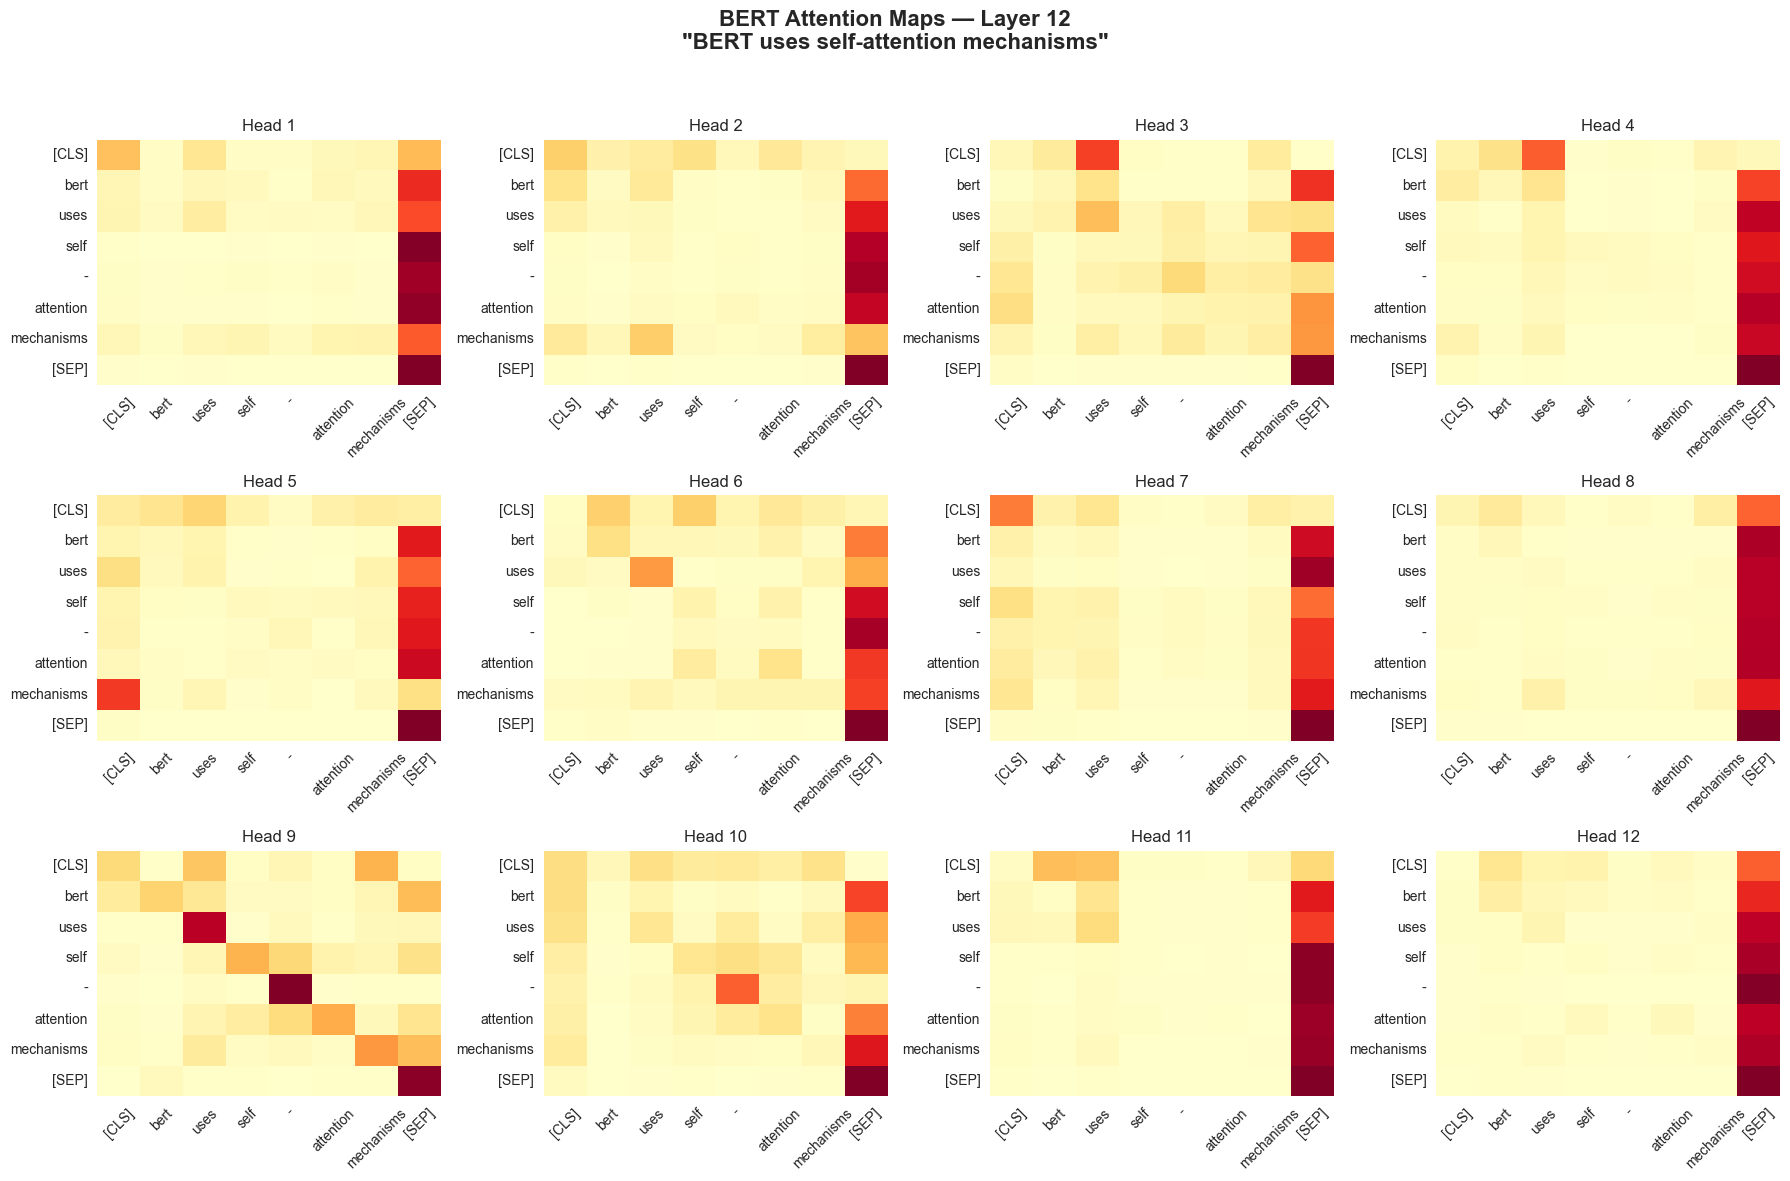

In [10]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel

# --- Load model and tokenizer ---
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# --- Input text ---
text = "BERT uses self-attention mechanisms"
inp = tokenizer(text, return_tensors='pt')

# --- Get attentions from model ---
with torch.no_grad():
    out = model(**inp, output_attentions=True)

# --- Select layer (e.g., last layer = -1) ---
layer_index = -1
attn_layer = out.attentions[layer_index][0]  # shape: (num_heads, seq_len, seq_len)

tokens = tokenizer.convert_ids_to_tokens(inp['input_ids'][0])
num_heads = attn_layer.shape[0]

# --- Plot all heads ---
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # 12 heads = 3x4 grid
fig.suptitle(f'BERT Attention Maps — Layer {layer_index % 12 + 1}\n"{text}"', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    if i < num_heads:
        sns.heatmap(attn_layer[i].numpy(), xticklabels=tokens, yticklabels=tokens,
                    cmap='YlOrRd', cbar=False, ax=ax)
        ax.set_title(f'Head {i + 1}', fontsize=12)
        ax.tick_params(axis='x', labelrotation=45)
    else:
        ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


✅ Loaded 12 layers × 12 heads


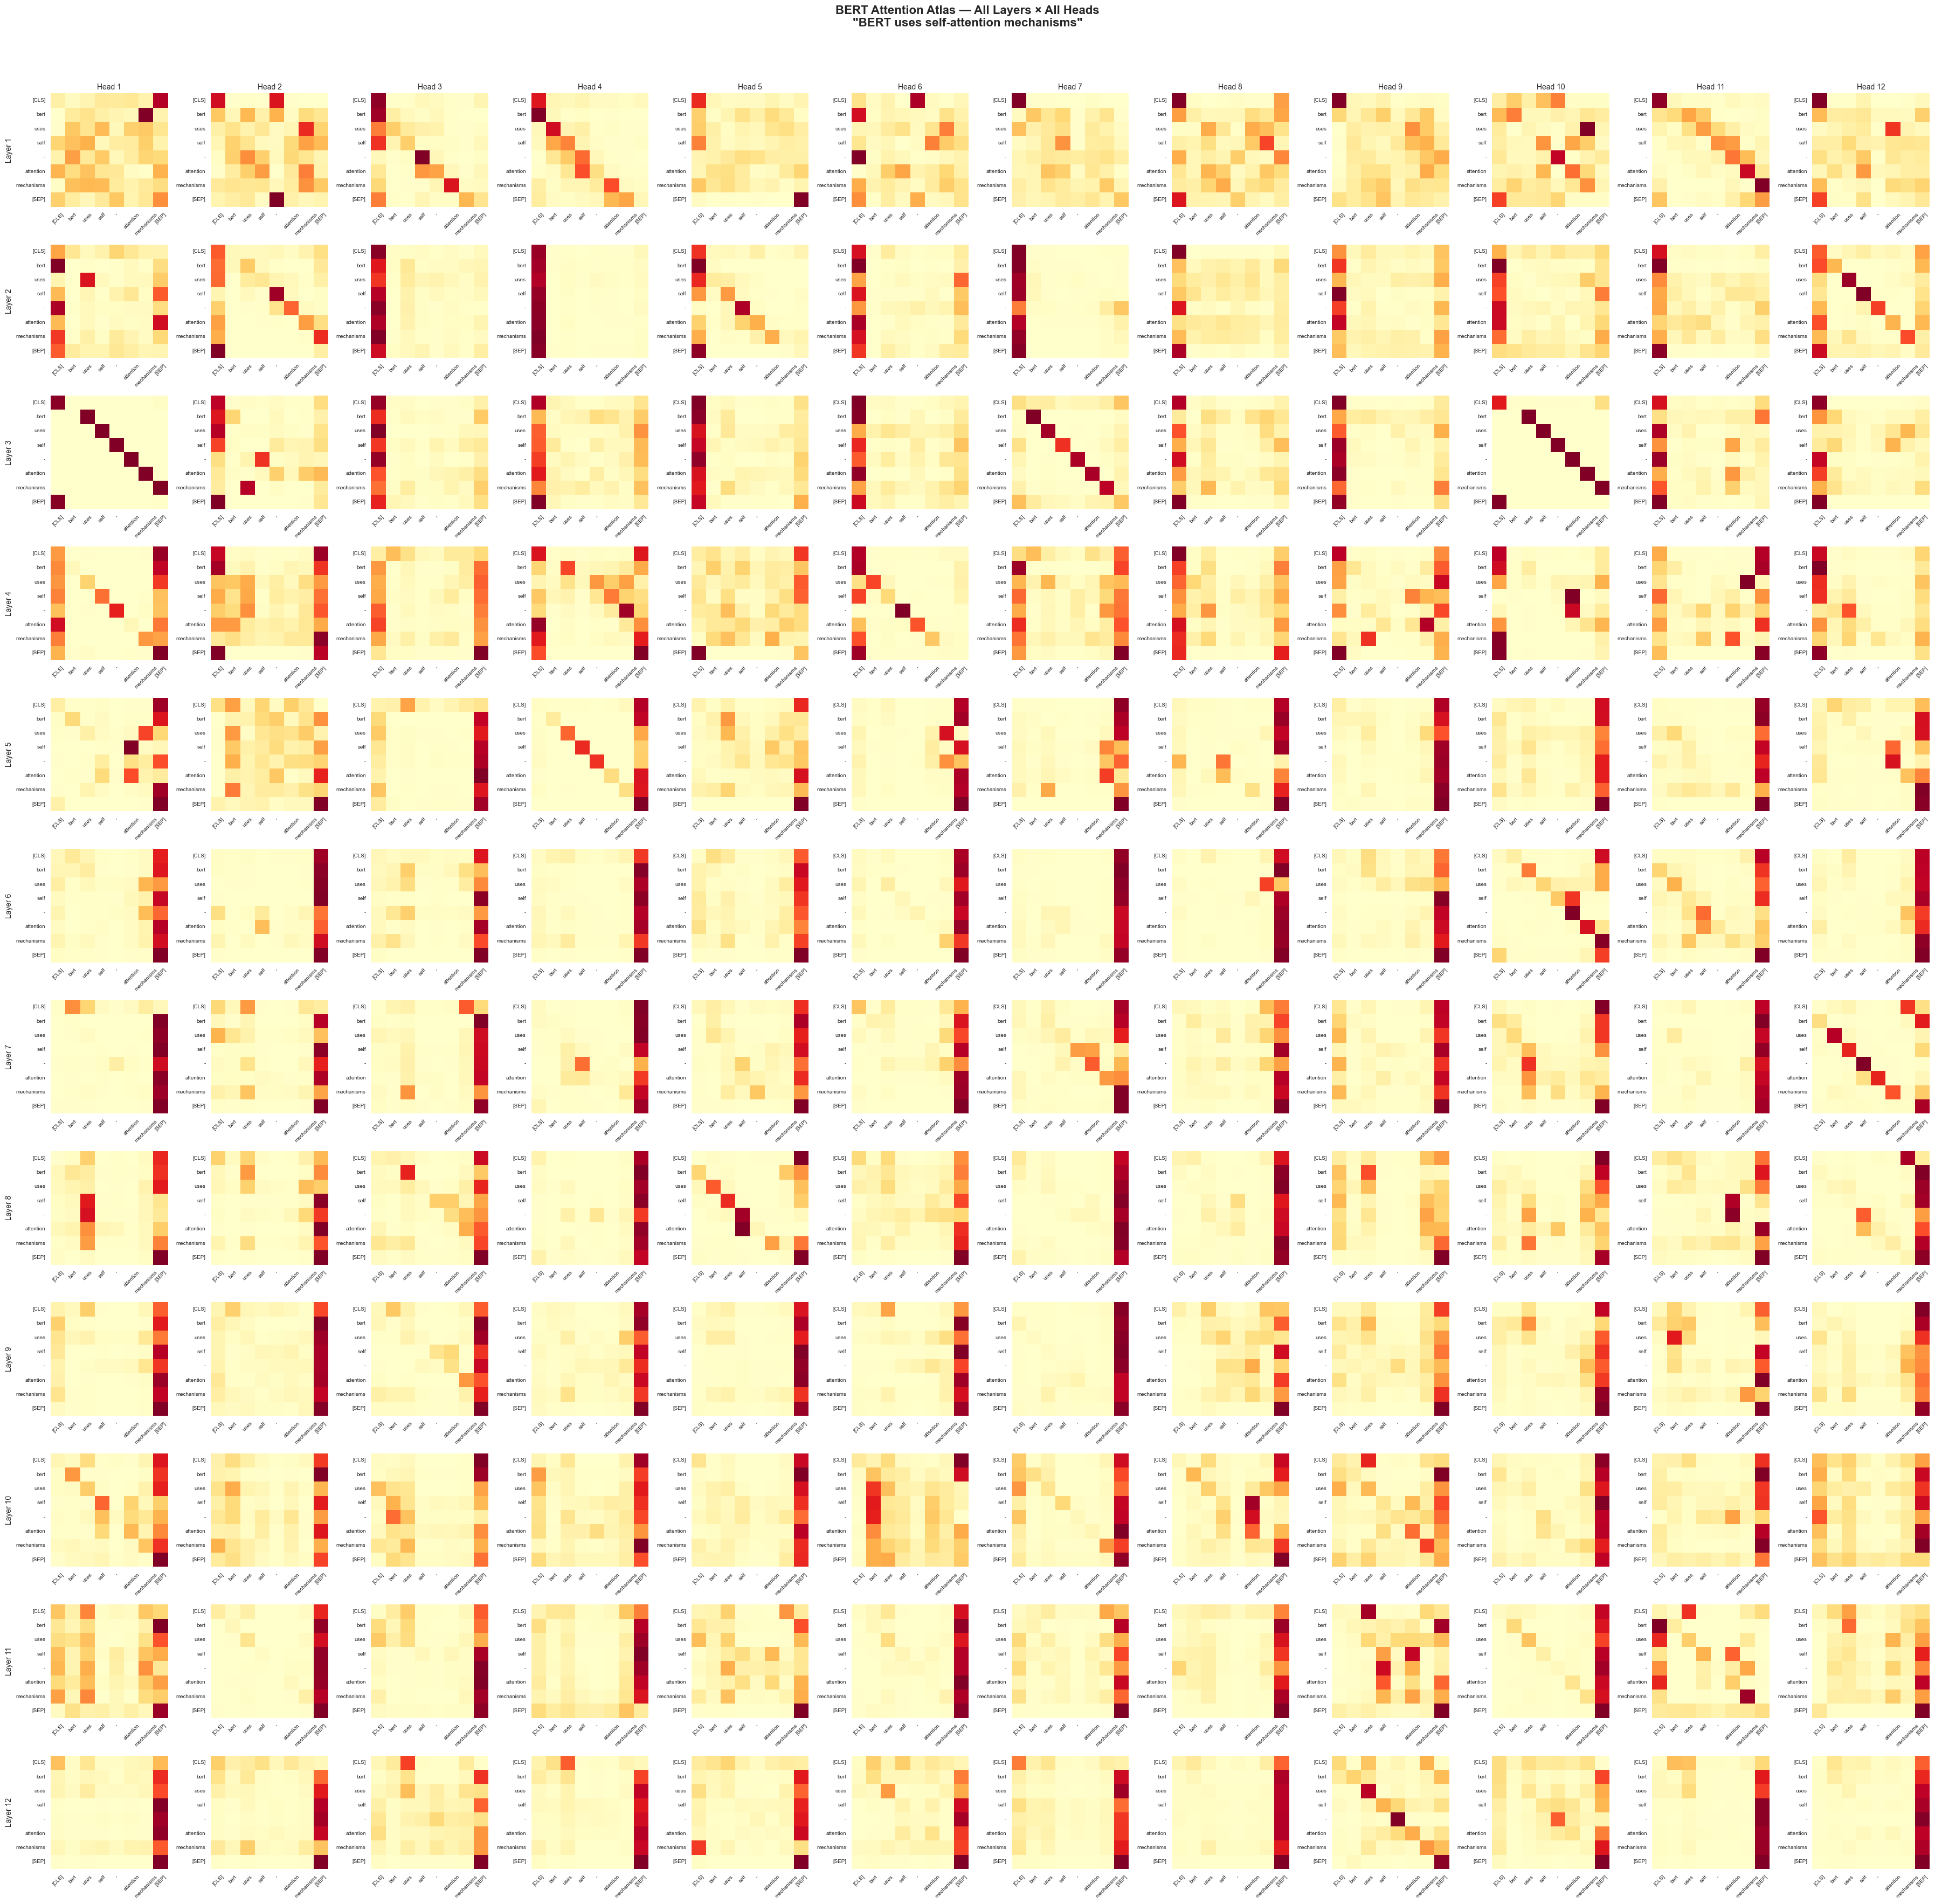

In [11]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel

# --- Load model and tokenizer ---
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# --- Input text ---
text = "BERT uses self-attention mechanisms"
inp = tokenizer(text, return_tensors="pt")

# --- Forward pass with attention outputs ---
with torch.no_grad():
    out = model(**inp, output_attentions=True)

tokens = tokenizer.convert_ids_to_tokens(inp["input_ids"][0])
num_layers = len(out.attentions)
num_heads = out.attentions[0].shape[1]

print(f"✅ Loaded {num_layers} layers × {num_heads} heads")

# --- Visualization: all layers × all heads ---
fig, axes = plt.subplots(num_layers, num_heads, figsize=(3*num_heads, 3*num_layers))

for layer_idx in range(num_layers):
    for head_idx in range(num_heads):
        ax = axes[layer_idx, head_idx]
        attn = out.attentions[layer_idx][0, head_idx].numpy()

        sns.heatmap(
            attn,
            xticklabels=tokens,
            yticklabels=tokens,
            cmap="YlOrRd",
            cbar=False,
            ax=ax
        )

        # Titles and labels
        if layer_idx == 0:
            ax.set_title(f"Head {head_idx + 1}", fontsize=10, pad=5)
        if head_idx == 0:
            ax.set_ylabel(f"Layer {layer_idx + 1}", fontsize=10)
        ax.tick_params(axis="x", labelrotation=45, labelsize=7)
        ax.tick_params(axis="y", labelsize=7)

plt.suptitle(f"BERT Attention Atlas — All Layers × All Heads\n\"{text}\"", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


🧠 What this shows
- Rows → Transformer layers (1–12 for BERT base).
- Columns → Attention heads (1–12 per layer).
- Each heatmap → One head’s attention for the given layer.
- Brighter squares = stronger attention weights between tokens.

💡 Observations to try
- Lower layers (Layer 1–4): focus more locally (syntax, word order).
- Middle layers: capture relationships (subject–verb, adjective–noun).
- Upper layers: attend globally (sentence meaning, CLS token).

In [ ]:
!pip install torch transformers plotly ipywidgets -q

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import plotly.graph_objects as go
from ipywidgets import interact

# --- Load model and tokenizer ---
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# --- Input text ---
text = "BERT uses self-attention mechanisms"
inp = tokenizer(text, return_tensors="pt")

# --- Forward pass with attention outputs ---
with torch.no_grad():
    out = model(**inp, output_attentions=True)

tokens = tokenizer.convert_ids_to_tokens(inp["input_ids"][0])
num_layers = len(out.attentions)
num_heads = out.attentions[0].shape[1]

print(f"✅ Loaded {num_layers} layers × {num_heads} heads")

# --- Interactive plot function ---
def show_attention(layer_idx=11, head_idx=0):
    attn = out.attentions[layer_idx][0, head_idx].numpy()
    
    fig = go.Figure(
        data=go.Heatmap(
            z=attn,
            x=tokens,
            y=tokens,
            colorscale="YlOrRd",
            hovertemplate="From: %{y}<br>To: %{x}<br>Attention: %{z:.3f}<extra></extra>",
        )
    )

    fig.update_layout(
        title=f"BERT Attention — Layer {layer_idx + 1}, Head {head_idx + 1}<br>\"{text}\"",
        xaxis_title="Token (attended to)",
        yaxis_title="Token (attending)",
        width=700,
        height=600,
    )

    fig.show()

# --- Use widgets for interactivity ---
interact(show_attention, layer_idx=(0, num_layers - 1), head_idx=(0, num_heads - 1))


✅ Loaded 12 layers × 12 heads


## Part 5: Groq LLM Integration (20 min)

In [10]:
from groq import Groq
import os

api_key = os.environ.get('GROQ_API_KEY', 'your-key-here')

if api_key != 'your-key-here':
    client = Groq(api_key=api_key)
    print('✅ Groq initialized')
    
    # Make a call
    resp = client.chat.completions.create(
        model='llama-3.3-70b-versatile',
        messages=[{'role': 'user', 'content': 'Explain LLMs in 30 words'}],
        max_tokens=50
    )
    
    answer = resp.choices[0].message.content
    inp_tok = resp.usage.prompt_tokens
    out_tok = resp.usage.completion_tokens
    cost = calc('Groq-Llama-70B', inp_tok, out_tok)
    
    print(f'\nResponse: {answer}')
    print(f'Tokens: {inp_tok} in + {out_tok} out')
    print(f'Cost: ${cost:.6f}')
else:
    print('⚠️  Set GROQ_API_KEY: export GROQ_API_KEY="your-key"')

✅ Groq initialized


NameError: name 'calc' is not defined

## Summary

**Completed:**
1. ✅ Token splitting visualization
2. ✅ GPT-4 vs Groq detailed cost comparison
3. ✅ BERT embeddings (768-dim)
4. ✅ PCA & t-SNE visualization
5. ✅ Semantic similarity heatmap
6. ✅ Attention mechanism visualization
7. ✅ Real Groq LLM integration

**Key Insights:**
- Groq saves 95%+ vs GPT-4
- BERT clusters similar meanings
- Attention shows token relationships
- Every prompt = budget decision!

In [11]:
from dotenv import load_dotenv
from groq import Groq
import os

# Load variables from .env file
load_dotenv()

# Get the API key
api_key = os.getenv("GROQ_API_KEY")

if not api_key:
    print("⚠️  GROQ_API_KEY not found in .env file!")
    exit(1)

# Initialize Groq client
client = Groq(api_key=api_key)
print("✅ Groq client initialized successfully")

# Make a simple test request (completion)
try:
    response = client.chat.completions.create(
        model="llama-3.3-70b-versatile",  # You can change model if needed
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": "20+3=? tell a story on it"}
        ],
        max_tokens=200,
        temperature=0
    )

    print("\n🧾 Response from Groq:")
    print(response.choices[0].message.content)

except Exception as e:
    print(f"❌ Error: {e}")


✅ Groq client initialized successfully

🧾 Response from Groq:
Once upon a time, in a small village, there lived a young boy named Timmy. Timmy loved playing with his friends in the village square, and one day, they stumbled upon a mysterious math problem written on a chalkboard: 20+3=?

Intrigued, Timmy decided to take on the challenge. He thought to himself, "Hmm, if I have 20 apples in a basket and my friend gives me 3 more, how many apples will I have in total?"

Timmy closed his eyes, imagined the scenario, and started counting in his head. He pictured the 20 apples in the basket, and then, one by one, he added the 3 new apples his friend had given him.

As he counted, the villagers gathered around, curious to see how Timmy would solve the problem. With a big smile on his face, Timmy finally opened his eyes and exclaimed, "I have it! The answer is... 23!"

The
